In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [45]:
df=pd.read_excel('/Users/michaelru/Desktop/Fall_2022/QTM_302W/poster_project_dataset.xlsx')
df

,rank,player,wins,win_percentage,serve_point_win_percentage,aces,ace_percentage,df,df_percentage,first_serve_in_percentage,first_serve_won_percentage,second_serve_won_percentage,hold_rate,return_points_won_percentage,ace_rate_against,return_won_first_serve,return_won_second_serve,break_rate
0,1,Carlos Alcaraz [ESP],70,0.814,0.660,241,0.047,166,0.032,0.662,0.716,0.551,0.842,0.415,0.041,0.340,0.535,0.308
1,2,Rafael Nadal [ESP],47,0.830,0.665,213,0.061,153,0.044,0.647,0.732,0.543,0.837,0.404,0.077,0.330,0.531,0.286
2,3,Casper Ruud [NOR],72,0.694,0.682,371,0.076,136,0.028,0.646,0.754,0.551,0.860,0.365,0.080,0.293,0.492,0.220
3,4,Stefanos Tsitsipas [GRE],84,0.726,0.687,569,0.095,155,0.026,0.629,0.768,0.549,0.864,0.355,0.062,0.274,0.496,0.204
4,5,Novak Djokovic [SRB],51,0.863,0.707,254,0.080,86,0.027,0.647,0.780,0.572,0.886,0.408,0.086,0.323,0.559,0.271
5,6,Felix Auger Aliassime [CAN],86,0.698,0.677,829,0.144,255,0.044,0.645,0.771,0.506,0.863,0.370,0.054,0.307,0.482,0.208
6,7,Daniil Medvedev [RUS],67,0.716,0.678,583,0.121,244,0.051,0.640,0.770,0.513,0.869,0.393,0.049,0.312,0.537,0.260
7,8,Andrey Rublev [RUS],74,0.730,0.670,531,0.104,142,0.028,0.624,0.766,0.509,0.844,0.383,0.091,0.298,0.517,0.240
8,9,Taylor Fritz [USA],66,0.682,0.678,637,0.126,134,0.027,0.616,0.772,0.527,0.857,0.381,0.068,0.299,0.522,0.245
9,10,Hubert Hurkacz [POL],62,0.661,0.697,795,0.166,95,0.020,0.637,0.782,0.549,0.906,0.343,0.072,0.267,0.475,0.170


In [7]:
df.columns.tolist()

['rank',
 'player',
 'wins',
 'win_percentage',
 'serve_point_win_percentage',
 'aces',
 'ace_percentage',
 'df',
 'df_percentage',
 'first_serve_in_percentage',
 'first_serve_won_percentage',
 'second_serve_won_percentage',
 'hold_rate',
 'return_points_won_percentage',
 'ace_rate_against',
 'return_won_first_serve',
 'return_won_second_serve',
 'break_rate']

In [10]:
df.describe()

,rank,wins,win_percentage,serve_point_win_percentage,aces,ace_percentage,df,df_percentage,first_serve_in_percentage,first_serve_won_percentage,second_serve_won_percentage,hold_rate,return_points_won_percentage,ace_rate_against,return_won_first_serve,return_won_second_serve,break_rate
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,25.50000,58.240000,0.617500,0.656380,365.940000,0.087860,146.340000,0.034440,0.63972,0.731560,0.524300,0.825020,0.372480,0.073900,0.296000,0.501580,0.22624
std,14.57738,12.082303,0.093829,0.030537,212.154392,0.050817,79.149461,0.015622,0.03165,0.044713,0.026499,0.049694,0.028925,0.021378,0.029126,0.033998,0.04788
min,1.00000,33.000000,0.447000,0.584000,63.000000,0.015000,49.000000,0.014000,0.57300,0.635000,0.440000,0.697000,0.276000,0.037000,0.209000,0.393000,0.07600
25%,13.25000,48.500000,0.548750,0.636250,223.750000,0.049250,95.750000,0.024250,0.61850,0.702500,0.508000,0.793750,0.359000,0.054750,0.278250,0.489500,0.19650
50%,25.50000,59.500000,0.590500,0.657500,306.000000,0.077500,133.000000,0.029000,0.64000,0.738500,0.527000,0.827500,0.379000,0.073500,0.299000,0.505000,0.23800
75%,37.75000,66.750000,0.676750,0.676750,496.750000,0.110750,158.750000,0.042750,0.65750,0.768000,0.541250,0.856750,0.391250,0.090750,0.317000,0.524000,0.26150
max,50.00000,86.000000,0.863000,0.722000,829.000000,0.250000,482.000000,0.095000,0.72100,0.807000,0.582000,0.929000,0.424000,0.119000,0.354000,0.559000,0.31400


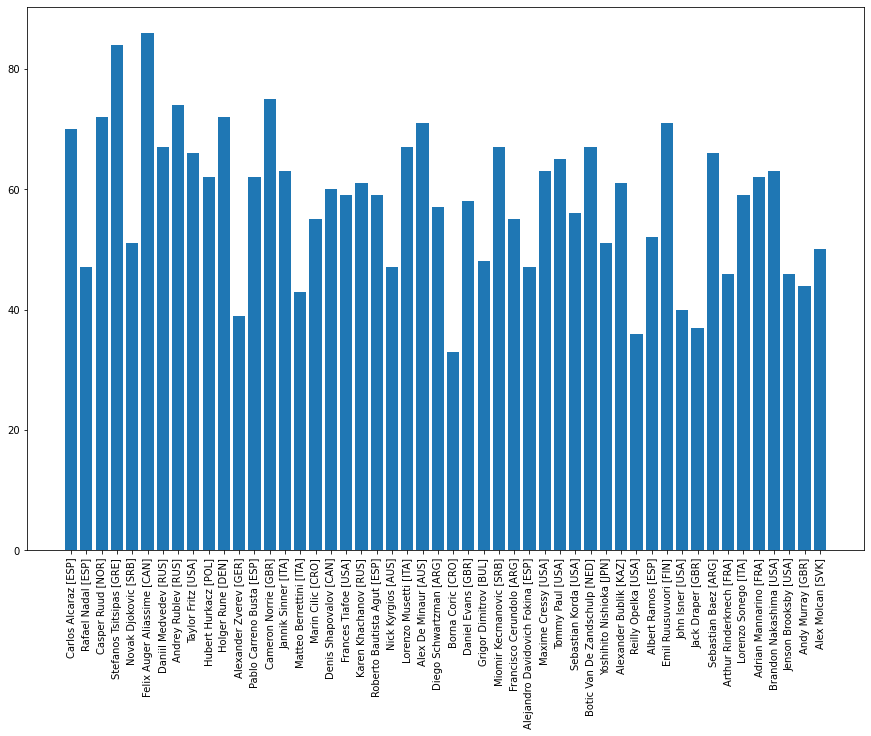

In [26]:
plt.figure(figsize=(15, 10))
plt.bar(df['player'], df['wins'])
plt.xticks(rotation='vertical')
plt.show()

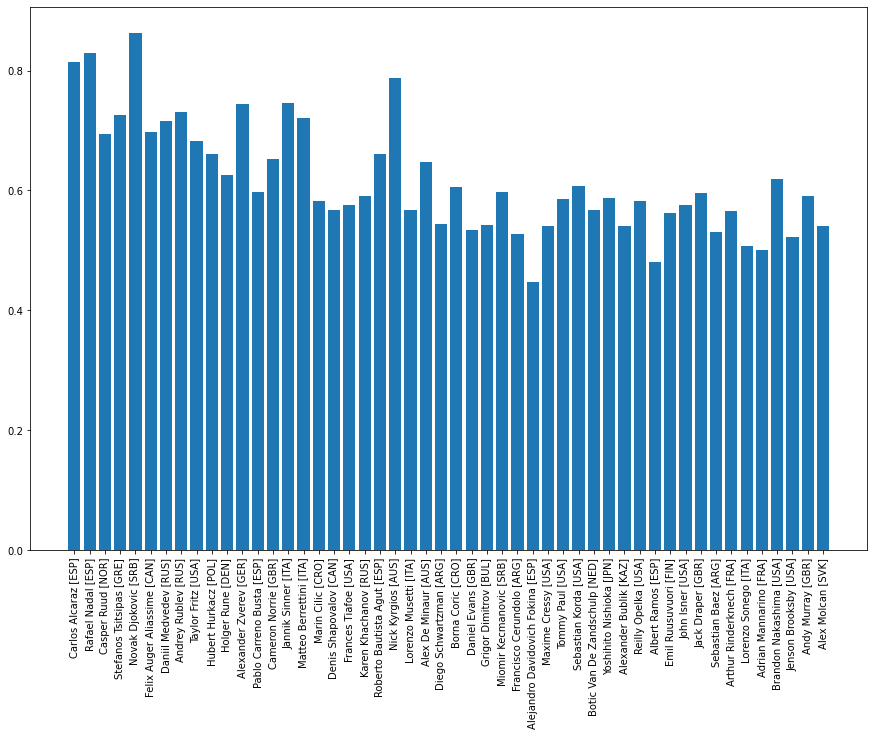

In [59]:
plt.figure(figsize=(15, 10))
plt.bar(df['player'], df['win_percentage'])
plt.xticks(rotation='vertical')
plt.show()

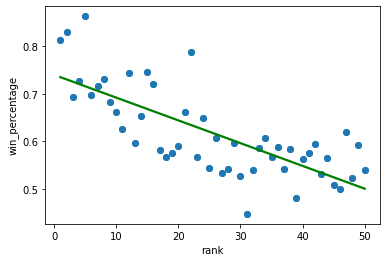

In [35]:
plt.scatter(df['rank'], df['win_percentage'])
sns.regplot(x = "rank",y = "win_percentage", data = df, line_kws = {'color':'green'}, ci = None)
plt.show()

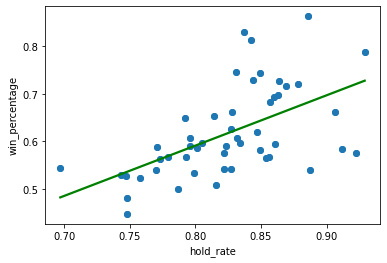

In [32]:
plt.scatter(df['hold_rate'], df['win_percentage'])
sns.regplot(x = "hold_rate",y = "win_percentage", data = df, line_kws = {'color':'green'}, ci = None)
plt.show()


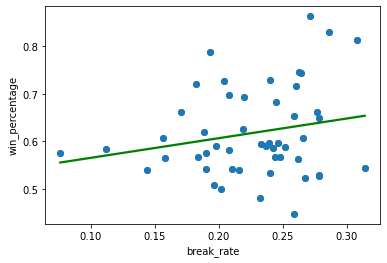

In [34]:
plt.scatter(df['break_rate'], df['win_percentage'])
sns.regplot(x = "break_rate",y = "win_percentage", data = df, line_kws = {'color':'green'}, ci = None)
plt.show()


In [51]:
m1 = smf.ols(formula='np.log(win_percentage) ~ np.log(hold_rate)+np.log(ace_percentage)+np.log(df_percentage)', data = df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(win_percentage)   R-squared:                       0.786
Model:                                OLS   Adj. R-squared:                  0.772
Method:                     Least Squares   F-statistic:                     56.28
Date:                    Wed, 30 Nov 2022   Prob (F-statistic):           1.97e-15
Time:                            16:37:58   Log-Likelihood:                 64.040
No. Observations:                      50   AIC:                            -120.1
Df Residuals:                          46   BIC:                            -112.4
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.6052      0.234      6.853      0.000       1.134       2.077
np.log(hold_rate)                        2.6982      0.211     12.779      0.000       2.273       3.123
np.log(ace_rate_against)                 0.0149      0.036      0.416      0.680      -0.057       0.087
np.log(return_points_won_percentage)     1.5491      0.164      9.443      0.000       1.219       1.879
==============================================================================
Omnibus:                        1.641   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.139
Skew:                           0.009   Prob(JB):                        0.566
Kurtosis:                       2.261   Cond. No.                         97.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
m2 = smf.ols(formula='np.log(win_percentage) ~ np.log(break_rate)+np.log(ace_rate_against)+np.log(return_points_won_percentage)', data = df).fit()
m2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(win_percentage)   R-squared:                       0.032
Model:                                OLS   Adj. R-squared:                 -0.031
Method:                     Least Squares   F-statistic:                    0.5072
Date:                    Wed, 30 Nov 2022   Prob (F-statistic):              0.679
Time:                            16:38:18   Log-Likelihood:                 26.322
No. Observations:                      50   AIC:                            -44.64
Df Residuals:                          46   BIC:                            -37.00
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -0.5093      0.751     -0.679      0.501      -2.020       1.001
np.log(break_rate)                       0.2318      0.425      0.546      0.588      -0.623       1.087
np.log(ace_rate_against)                 0.0123      0.076      0.162      0.872      -0.141       0.166
np.log(return_points_won_percentage)    -0.4037      1.320     -0.306      0.761      -3.061       2.254
==============================================================================
Omnibus:                        0.918   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.977
Skew:                           0.287   Prob(JB):                        0.614
Kurtosis:                       2.628   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
m3 = smf.ols(formula='np.log(win_percentage) ~ np.log(hold_rate)+np.log(ace_percentage)+np.log(df_percentage)+np.log(break_rate)+np.log(ace_rate_against)+np.log(return_points_won_percentage)', data = df).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(win_percentage)   R-squared:                       0.804
Model:                                OLS   Adj. R-squared:                  0.777
Method:                     Least Squares   F-statistic:                     29.43
Date:                    Wed, 30 Nov 2022   Prob (F-statistic):           1.04e-13
Time:                            16:43:22   Log-Likelihood:                 66.272
No. Observations:                      50   AIC:                            -118.5
Df Residuals:                          43   BIC:                            -105.2
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.5708      0.422      3.725      0.001       0.720       2.421
np.log(hold_rate)                        3.1023      0.357      8.679      0.000       2.381       3.823
np.log(ace_percentage)                  -0.0520      0.043     -1.203      0.236      -0.139       0.035
np.log(df_percentage)                   -0.0223      0.031     -0.717      0.477      -0.085       0.041
np.log(break_rate)                      -0.1778      0.204     -0.873      0.387      -0.588       0.233
np.log(ace_rate_against)                -0.0047      0.038     -0.124      0.902      -0.080       0.071
np.log(return_points_won_percentage)     1.9731      0.643      3.069      0.004       0.676       3.270
==============================================================================
Omnibus:                        0.882   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.843
Skew:                          -0.081   Prob(JB):                        0.656
Kurtosis:                       2.385   Cond. No.                         434.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
reg_results = Stargazer([m1, m2, m3])
reg_results.title('Regression results on Top 50 Tennis Players Match Winning Percentage')
reg_results.custom_columns (['Model 1', 'Model 2', 'Model 3'], [1,1,1])
HTML(reg_results.render_html())